# Program Description
This Jupyter Notebook imports various libraries for data analysis and visualization, including pandas, matplotlib, and seaborn. It performs an analysis of decision-making data from CSV files stored on Google Drive.

#Data Processing
Mounting Google Drive: The notebook mounts Google Drive and verifies the storage path for the required CSV files.

Loading Data: Two CSV files (as example the created files: agenten_dialog_mod_4.csv and agenten_dialog_pure_4.csv) are loaded into Pandas DataFrames.

Determining Cooperation Status:

For the pure dataset, rounds are grouped, and a classification function identifies whether both agents cooperated.

The mod dataset is also classified based on two decision columns.

#Visualization
Goethe Color Palette: A predefined color palette (turquoise for cooperation, blue for no cooperation) is used for visualization.

Cooperation Status Charts:

The number of cooperative and non-cooperative rounds is calculated.

A bar chart for the pure dataset and another for the mod dataset is created using seaborn as sns shortname.

The Y-axis is restricted to whole numbers for clear representation.

#Partial Cooperation
Added the partial cooperation and the cooperation into a table.

Mounted at /content/drive


/tmp/ipython-input-1-3717075808.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=cooperation_counts, x='Kooperation_Status', y='Anzahl', palette=goethe_coop_palette)


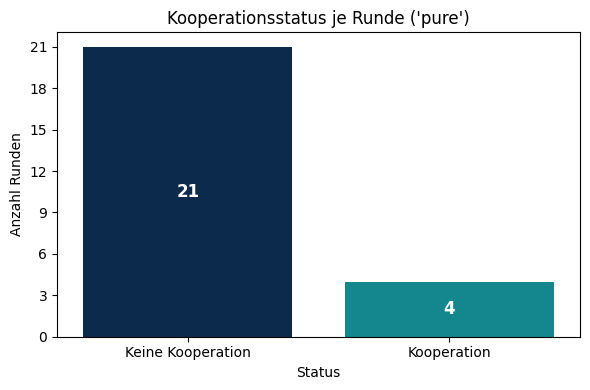

/tmp/ipython-input-1-3717075808.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mod_cooperation_counts, x='Kooperation_Status', y='Anzahl', palette=goethe_coop_palette)


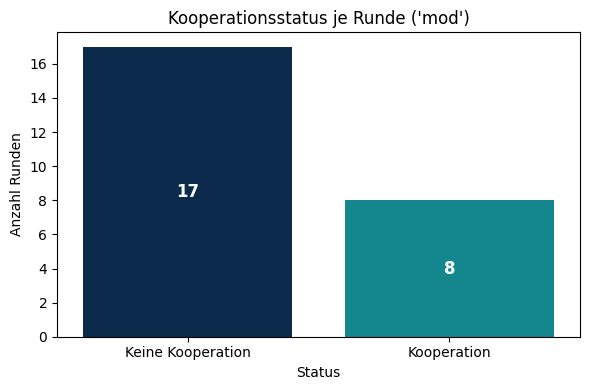

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from google.colab import drive
import os

# Google Drive einbinden
drive.mount('/content/drive')

# Automatische Pfadkorrektur
drive_folder = "/content/drive/MyDrive/data/Debatten/"
if not os.path.exists(drive_folder):
    drive_folder = "/content/drive/My Drive/data/Debatten/"

# CSV-Dateien laden
df_mod = pd.read_csv(drive_folder + "agenten_dialog_mod_25runden_5.csv")
df_pure = pd.read_csv(drive_folder + "agenten_dialog_pure_25runden_5.csv")

# Farbpalette
goethe_coop_palette = {
    'Kooperation': '#0098A1',
    'Keine Kooperation': '#002957'
}

# Verarbeitung für df_pure
decisions_by_round = df_pure.groupby('Runde')['Entscheidung'].apply(list).reset_index()

def classify_cooperation(decision_list):
    return 'Kooperation' if decision_list.count('kooperieren') == 2 else 'Keine Kooperation'

decisions_by_round['Kooperation_Status'] = decisions_by_round['Entscheidung'].apply(classify_cooperation)

cooperation_counts = decisions_by_round['Kooperation_Status'].value_counts().reset_index()
cooperation_counts.columns = ['Kooperation_Status', 'Anzahl']

# Visualisierung für df_pure (mit Zahlen in den Balken)
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=cooperation_counts, x='Kooperation_Status', y='Anzahl', palette=goethe_coop_palette)
plt.title("Kooperationsstatus je Runde ('pure')")
plt.xlabel("Status")
plt.ylabel("Anzahl Runden")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Zahlen **in** den Balken schreiben (zentriert & kontrastreich)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{int(height)}',
        ha='center',
        va='center',
        fontsize=12,
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# Verarbeitung für df_mod
def classify_mod_row(row):
    return 'Kooperation' if row['entscheidung_c'] == 'kooperieren' and row['entscheidung_d'] == 'kooperieren' else 'Keine Kooperation'

df_mod['Kooperation_Status'] = df_mod.apply(classify_mod_row, axis=1)

mod_cooperation_counts = df_mod['Kooperation_Status'].value_counts().reset_index()
mod_cooperation_counts.columns = ['Kooperation_Status', 'Anzahl']

# 📈 Visualisierung für df_mod (mit Zahlen in den Balken)
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=mod_cooperation_counts, x='Kooperation_Status', y='Anzahl', palette=goethe_coop_palette)
plt.title("Kooperationsstatus je Runde ('mod')")
plt.xlabel("Status")
plt.ylabel("Anzahl Runden")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Zahlen in den Balken
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{int(height)}',
        ha='center',
        va='center',
        fontsize=12,
        color='white',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()



In [12]:
# Imports
import pandas as pd
from google.colab import drive
import os

# Google Drive mounten
drive.mount('/content/drive')

# Pfad zur CSV-Dateien
drive_folder = "/content/drive/MyDrive/data/Debatten/"
if not os.path.exists(drive_folder):
    drive_folder = "/content/drive/My Drive/data/Debatten/"

# Funktion zur Auswertung einer Datei
def auswertung_einzeln(spieltyp, nummer):
    filename = f"agenten_dialog_{spieltyp}_25runden_{nummer}.csv"
    df = pd.read_csv(drive_folder + filename)

    if spieltyp == "pure":
        decisions_by_round = df.groupby('Runde')['Entscheidung'].apply(list).reset_index()

        def classify_coop(d):
            return d.count("kooperieren") == 2

        def classify_partial(d):
            return "kooperieren" in d

        coop_count = decisions_by_round['Entscheidung'].apply(classify_coop).sum()
        partial_coop_count = decisions_by_round['Entscheidung'].apply(classify_partial).sum()
        total_rounds = len(decisions_by_round)

    elif spieltyp == "mod":
        def both_coop(row):
            return row['entscheidung_c'] == 'kooperieren' and row['entscheidung_d'] == 'kooperieren'

        def at_least_one_coop(row):
            return row['entscheidung_c'] == 'kooperieren' or row['entscheidung_d'] == 'kooperieren'

        coop_count = df.apply(both_coop, axis=1).sum()
        partial_coop_count = df.apply(at_least_one_coop, axis=1).sum()
        total_rounds = len(df)

    return {
        "Spiel-Nr.": nummer,
        "Spieltyp": spieltyp,
        "Kooperationen (beide)": coop_count,
        "Teilweise Kooperationen (mind. einer)": partial_coop_count,
        "Runden gesamt": total_rounds,
        "Kooperationsrate (%)": round(100 * coop_count / total_rounds, 2),
        "Teilweise Kooperationsrate (%)": round(100 * partial_coop_count / total_rounds, 2)
    }

# Paarweise Analyse für 5 Durchläufe
alle_ergebnisse = []

for i in range(1, 6):
    alle_ergebnisse.append(auswertung_einzeln("pure", i))
    alle_ergebnisse.append(auswertung_einzeln("mod", i))

# DataFrame zur Darstellung
vergleich_df = pd.DataFrame(alle_ergebnisse)

# Schön formatierte Anzeige
vergleich_df.style.format({
    'Kooperationsrate (%)': '{:.2f} %',
    'Teilweise Kooperationsrate (%)': '{:.2f} %'
}).set_caption("Paarweiser Vergleich: pure vs. mod je Spielrunde").hide(axis="index")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Spiel-Nr.,Spieltyp,Kooperationen (beide),Teilweise Kooperationen (mind. einer),Runden gesamt,Kooperationsrate (%),Teilweise Kooperationsrate (%)
1,pure,7,16,25,28.00 %,64.00 %
1,mod,6,20,25,24.00 %,80.00 %
2,pure,4,14,25,16.00 %,56.00 %
2,mod,8,15,25,32.00 %,60.00 %
3,pure,6,17,25,24.00 %,68.00 %
3,mod,5,22,25,20.00 %,88.00 %
4,pure,8,19,25,32.00 %,76.00 %
4,mod,7,17,25,28.00 %,68.00 %
5,pure,4,18,25,16.00 %,72.00 %
5,mod,8,17,25,32.00 %,68.00 %
